# Model Prediction

Based on the ` N-gram + Naive Bayes` model we built in the last step, we will make a prediction on the test data in this step. Here are some keys in this part:

#### 1.  Preprocess the test data
#### 2. Transform the test data using TfidfVectorizer model
#### 3. Make prediction for test data using Naive Bayes model

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
import random
import codecs
import re
import string
from datetime import datetime
import os
print(os.listdir("../input"))

['feature-engineering-and-model-training', 'language-prediction']


First, we read the `N-gram + Naive Bayes` model we built in the last step.

In [2]:
f = open('../input/feature-engineering-and-model-training/model.pkl','rb')
model = pickle.load(f)
f.close()
model.keys()

dict_keys(['TfidfVectorizer', 'MultinomialNB'])

Here are two functions to extract clean text from test file. 

In [3]:
def extract_test_clean_sentence(file_path):
    '''
    Goal:  extract clean test from all test file. We split all paragraph to sentences and store all the sentences.
    @param file_path: the test file path.
    @return clean_sentences:  test_x list, test label list
    '''
    test_x, test_y = [], []
    with codecs.open(file_path, 'r', encoding="utf-8", errors = 'ignore') as f:
        for line in f:
            line = line.strip().split('\t') # Strip empty lines and split the text data to sentences by tab
            sentence = clean_sentence(line[1])
            test_x.append(sentence)
            test_y.append(line[0])
    return test_x, test_y

def clean_sentence(sentence):
    '''
    Goal: remove punctuation in the sentence
    @param sentence: a string which contains punctuation
    @return clean_sentences:  a strings (sentence).
    '''
    output = "".join(re.findall("[^\t\d\r\n–{}]+".format(string.punctuation),sentence.lower())) # 3,5. remove punctuation and lowercase the text¶
    output = output.strip()
    output = re.sub("\s+", " ", output) # 6. transform long space to ' '
    return output

test_x, test_y = extract_test_clean_sentence('../input/language-prediction/europarl.test')

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB 
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

We make the prediction for test data using  `N-gram + Naive Bayes` model. The overall accuracy is 0.9996 and the F1 score is 0.999619 which means the performance of the model on test data is good.

In [5]:
tfidf_vect, classifier = model['TfidfVectorizer'], model['MultinomialNB']
test_x = tfidf_vect.transform(test_x)
prediction = classifier.predict(test_x)
print('Performance: \n Accuracy: %f, F1 score: %f' % (accuracy_score(test_y, prediction), \
                                                      f1_score(test_y,prediction, average='macro')))

Performance: 
 Accuracy: 0.999619, F1 score: 0.999619


Here we can have a look at the performace of each language. We can see that the performance of each language are all great ! (Accuracy > 0.998, F1 score > 0.998)

In [6]:
labels = ['bg', 'cs', 'da', 'de', 'el', 'en', 'es', 'et', 
          'fi', 'fr', 'hu', 'it', 'lt', 'lv', 'nl', 'pl', 
          'pt', 'ro', 'sk', 'sl', 'sv']
full_name_label = {'bg': 'Bulgarian', 'cs': 'Czech', 'da': 'Danish', 'de': 'German', 'el': 'Greek', 
                   'en': 'English', 'es': 'Spanish', 'et': 'Estonian', 'fi': 'Finnish', 'fr': 'French', 
                   'hu': 'Hungarian', 'it': 'Italian', 'lt': 'Lithuanian', 'lv': 'Latvian', 'nl': 'Dutch', 
                   'pl': 'Polish', 'pt': 'Portuguese', 'ro': 'Romanian', 'sk': 'Slovak', 'sl': 'Slovenian', 
                   'sv': 'Swedish'}
test_y = np.array(test_y)
report = classification_report(test_y,prediction, output_dict = True)
performance = {'Abbreviation': labels, \
               'Language': [full_name_label[i] for i in labels], \
               'Accuracy': [accuracy_score(test_y[test_y == i], prediction[test_y == i]) for i in labels], \
               'F1 score': [report[i]['f1-score'] for i in labels], \
               'Precision': [report[i]['precision'] for i in labels], \
               'Recall': [report[i]['recall'] for i in labels], \
               'Support examples': [report[i]['support'] for i in labels]}

language_performace = pd.DataFrame(performance, columns=['Abbreviation', 'Language','Accuracy', 'F1 score',
                                                        'Precision','Recall','Support examples'])
language_performace

,Abbreviation,Language,Accuracy,F1 score,Precision,Recall,Support examples
0,bg,Bulgarian,1.000,1.000000,1.000000,1.000,1000
1,cs,Czech,0.998,0.998499,0.998999,0.998,1000
2,da,Danish,0.999,0.999500,1.000000,0.999,1000
3,de,German,1.000,1.000000,1.000000,1.000,1000
4,el,Greek,1.000,1.000000,1.000000,1.000,1000
5,en,English,1.000,0.998502,0.997009,1.000,1000
6,es,Spanish,1.000,0.999500,0.999001,1.000,1000
7,et,Estonian,1.000,1.000000,1.000000,1.000,1000
8,fi,Finnish,1.000,1.000000,1.000000,1.000,1000
9,fr,French,0.998,0.998999,1.000000,0.998,1000


Here we can make a heatmap for the confusion matrix of the prediction, and see the prediction result for each language in detail. We can see there is only few instance was mislabeled.

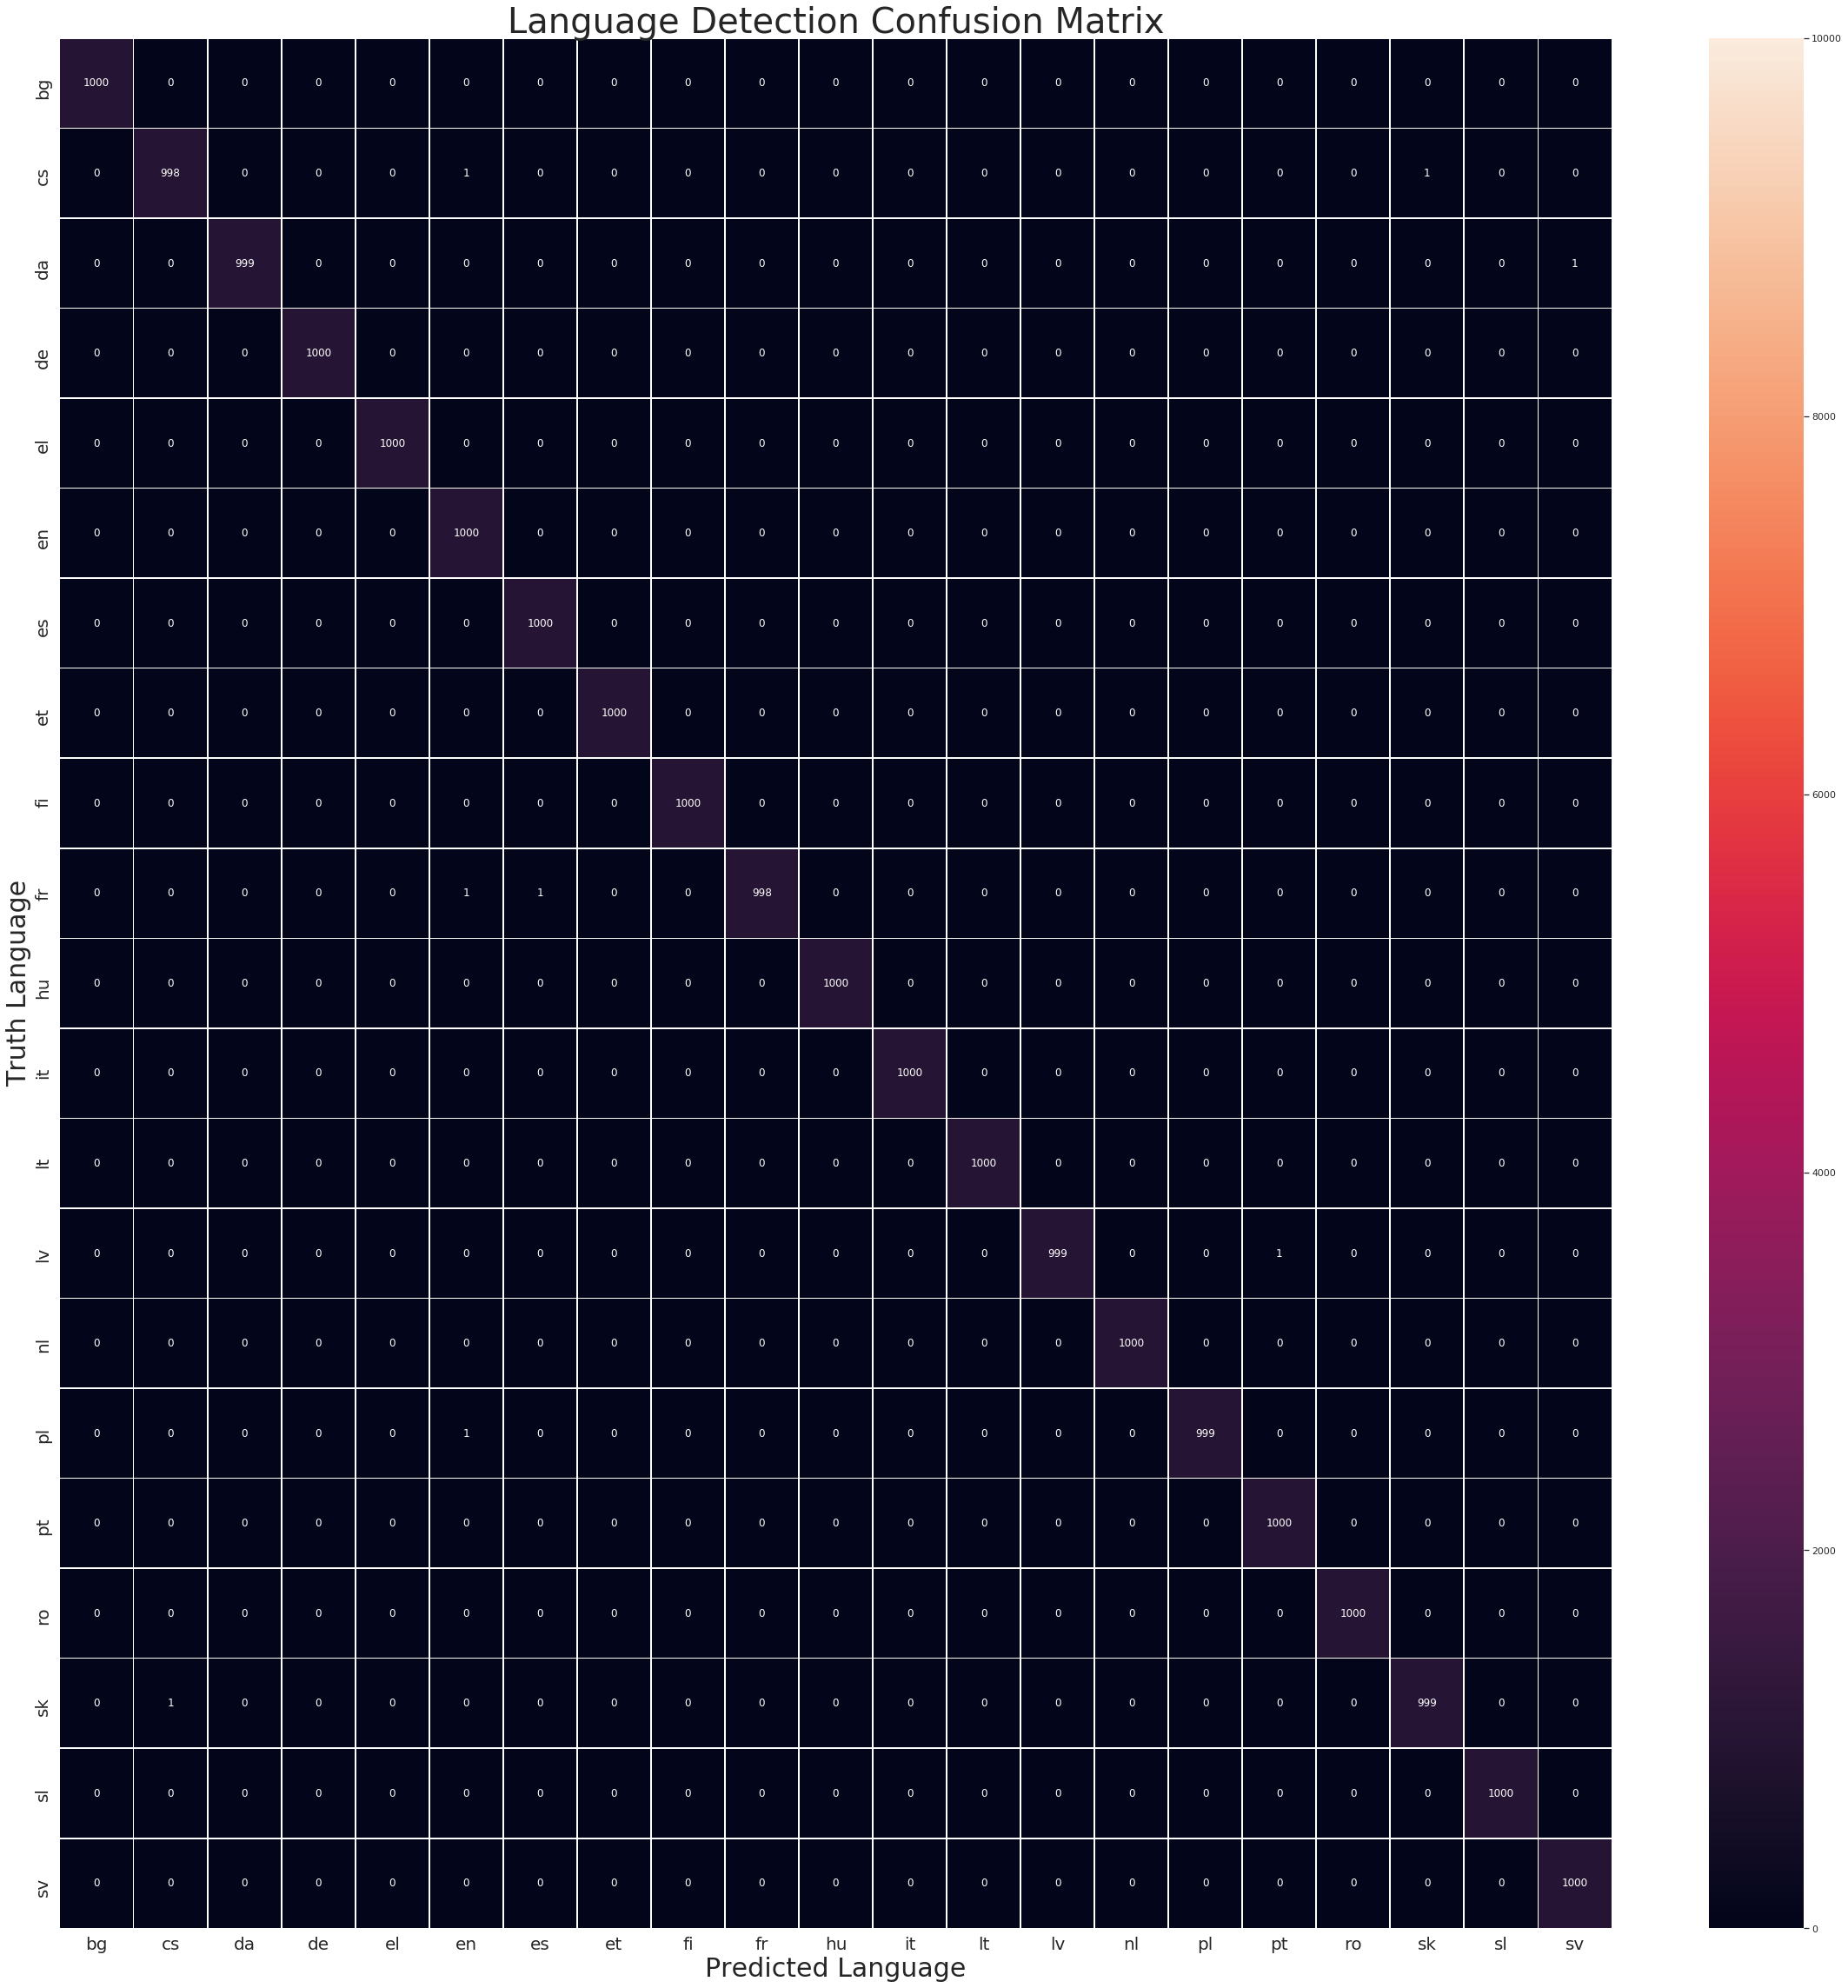

In [7]:
def plot_confusion_matrix(truth_y, pred_y, label):
    plt.figure(figsize=(40, 40))
    confusion_mat = confusion_matrix(truth_y, pred_y, labels = label)
    ax = sns.heatmap(confusion_mat, vmax=10000, annot=True, linecolor='white', linewidths=0.5,  fmt = 'd',\
                     xticklabels = label,  yticklabels = label)
    plt.xlabel('Predicted Language', fontsize=30)
    plt.ylabel('Truth Language', fontsize=30)
    plt.title('Language Detection Confusion Matrix',fontsize=40)
    ax.set_xticklabels(label, fontsize=20)
    ax.set_yticklabels(label, fontsize=20)

plot_confusion_matrix(test_y,prediction, labels)

# Conclusion

In this project, we have 21 European languages: Romanic (French, Italian, Spanish, Portuguese, Romanian), Germanic (English, Dutch, German, Danish, Swedish), Slavik (Bulgarian, Czech, Polish, Slovak, Slovene), Finni-Ugric (Finnish, Hungarian, Estonian), Baltic (Latvian, Lithuanian), and Greek. And we need to build a language detection engines to identify different languages of text data. 

For this task, the training corpus is processed in such a way: 1. Strip empty lines and their correspondences; 2. Remove lines with XML-Tags (starting with "<"); 3. Lowercase the text; 4. Split the text data to sentences by period; 5. Remove noisy characters and punctuation; 6. Transform long space to single space; 7. Control the length of each sentence ( > 1)

To balance the data, we control the number of sentences for each language. After preprocess the raw data, we split the `50000 * 21 = 1050000` sentences into train and validation part. 80% of the full dataset is train data and 20% of the full dataset is validation data, which means we have `50000 * 0.8 * 21 = 840000` sentences in the train data and `50000 * 0.2 * 21 = 210000` sentences in the test data.

Based on the literature 'Improved Text Language Identification for the South African Languages' [1] and Google Compact Language Detector 2 [2], we decide use `N-gram (TfidfVectorizer) + Naive Bayes` model to build the language detection engineer.

* [1] Duvenhage, Bernardt, Mfundo Ntini, and Phala Ramonyai. "Improved text language identification for the South African languages." Pattern Recognition Association of South Africa and Robotics and Mechatronics (PRASA-RobMech), 2017. IEEE, 2017.
* [2] https://github.com/CLD2Owners/cld2

In the `TfidfVectorizer` part,  we consider two parameters. One parameter is `analyzer`:  we use the  `char_wb` analyzer that  creates character n-grams only from text inside word boundaries; n-grams at the edges of words are padded with space. The other parameter is `ngram_range`: This parameter indicates the lower and upper boundary of the range of n-values for different n-grams to be extracted. Here we will tune the upper boundary of `ngram_range`(the largest N-gram that will be considered in feature engineering) from 1 to 6.  In the result, we find the performance didn't improve much from N > 4 on the valildation data. Thus, we choose n = 4 in the final model and there is 496647 N-gram ( 1 <= N <= 4) features in total.

Finally, we can see the performance of `N-gram (TfidfVectorizer) + Naive Bayes` is really good. It achieved accuracy with 0.9978 and F1 score with on 210000 validation data and accuracy with 0.9996 and F1 score with 0.9996 on test data.

# Future Work

According to the heatmap and the F1 score of each language on the validation data, we can see that many Lithuanian sentences was mislabeled as ohter languages. On the other hand,  we find that the recall for 'English' (en) is the best but the precision is the worst, which mean some sentences was mislabeled as 'en'. So we may add more instances for other language espicially Lithuanian data.

Moreover, we can try more amazing deep learning or NLP models, e.g. FastText, TextCNN, TextRNN, or make a ensembled model  based on them. I think the performance will aslo be good.